In [96]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from scipy import interpolate


In [97]:
home_path = os.getcwd()
data_path = home_path + "\\data\\michelson_interferance\\" #crude way of using relitive paths

file_names = os.listdir(data_path)

file_numbers = [name[5:-5] for name in file_names]
df = pd.DataFrame(np.transpose([file_names, file_numbers]), columns= ["file_names", "file_numbers"])
df["file_numbers"] = [int(number) for number in df["file_numbers"]]
df = df.sort_values("file_numbers", ignore_index= True)

In [98]:
maximums = [0]*df.shape[0] #initalise new list

for index in df.index:
    im = Image.open(data_path + df["file_names"][index])
    array = np.array(im, dtype= np.float16)
    maximums[index] = array.max()

df["max_intensity"] = maximums
df


,file_names,file_numbers,max_intensity
0,test_1.tiff,1,162.0
1,test_2.tiff,2,155.0
2,test_3.tiff,3,154.0
3,test_4.tiff,4,163.0
4,test_5.tiff,5,166.0
...,...,...,...
495,test_496.tiff,496,132.0
496,test_497.tiff,497,126.0
497,test_498.tiff,498,138.0
498,test_499.tiff,499,135.0


In [99]:
wave_count = 0

for index in df.index[1:-1]: #don't include the first and last datapoints
    if (maximums[index-1] <= maximums[index] and maximums[index] <= maximums[index+1]):
        wave_count += 1

print(wave_count)

89


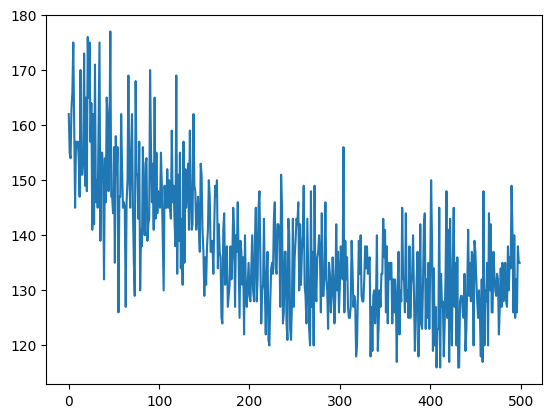

In [100]:
plt.plot(maximums)
plt.show()